## Importing necessary libraries

In [1]:
import os
import h5py
import matplotlib.pyplot as plt
import numpy as np
from ipynb.fs.full.User_defined_fns import *

## Loading training data

In [2]:
with h5py.File("datasets/train_catvnoncat.h5", "r") as train_set:
    train_set_x_orig = np.array(train_set["train_set_x"][:])
    train_set_y_orig = np.array(train_set["train_set_y"][:])
    classes = np.array(train_set["list_classes"][:])

## Loading testing data

In [3]:
with h5py.File("datasets/test_catvnoncat.h5", "r") as test_set:
    test_set_x_orig = np.array(test_set["test_set_x"][:])
    test_set_y_orig = np.array(test_set["test_set_y"][:])

## Displaying an image from the training set

'cat'

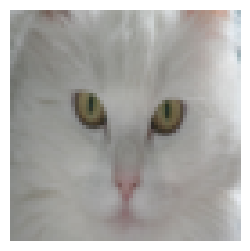

In [4]:
plt.figure(figsize=(3, 3))
plt.imshow(train_set_x_orig[50])
plt.axis("off")

# Decoding and displaying the class label of the image
classes[train_set_y_orig[50]].decode("utf-8")

## Printing the shapes of the datasets

In [5]:
print(f"train_set_x_orig: {train_set_x_orig.shape}")
print(f"train_set_y_orig: {train_set_y_orig.shape}")
print(f"test_set_x_orig: {test_set_x_orig.shape}")
print(f"test_set_y_orig: {test_set_y_orig.shape}")

## Getting the number of pixels in an image
num_px = train_set_x_orig.shape[1]
num_px

train_set_x_orig: (209, 64, 64, 3)
train_set_y_orig: (209,)
test_set_x_orig: (50, 64, 64, 3)
test_set_y_orig: (50,)


64

## Reshaping and normalizing the data

In [6]:
train_set_y = train_set_y_orig.reshape((1, -1))
test_set_y = test_set_y_orig.reshape((1, -1))

train_set_x = train_set_x_orig.reshape((train_set_x_orig.shape[0], -1)).T / 255
test_set_x = test_set_x_orig.reshape((test_set_x_orig.shape[0], -1)).T / 255

print(f"train_set_x: {train_set_x.shape}")
print(f"train_set_y: {train_set_y.shape}")
print(f"test_set_x: {test_set_x.shape}")
print(f"test_set_y: {test_set_y.shape}")

train_set_x: (12288, 209)
train_set_y: (1, 209)
test_set_x: (12288, 50)
test_set_y: (1, 50)


## Simple Logistic Regression

Cost after iteration 200: 5.171898543657102
Cost after iteration 400: 0.7051251144161244
Cost after iteration 600: 1.1932151883012203
Cost after iteration 800: 1.2997634531496411
Cost after iteration 1000: 0.03200090991198523
Cost after iteration 1200: 0.018966187516675316
Cost after iteration 1400: 0.014714311659253581
Cost after iteration 1500: 0.013398744953813171


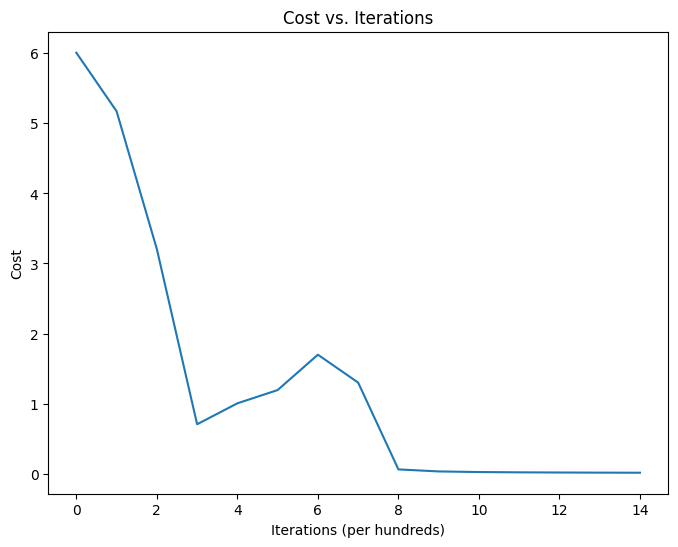

Train Accuracy:  100.0
Test Accuracy:  68.0


In [7]:
parameters, costs = model(
    train_set_x,
    train_set_y,
    layers_dims=[train_set_x.shape[0], 1],
    n_iters=1500,
    learning_rate=0.04,
    print_cost=True,
    print_cost_iters=200,
)
plot_costs(costs)

# Evaluating the model on training set
y_pred_train = predict(train_set_x, parameters)
print("Train Accuracy: ", accuracy(train_set_y, y_pred_train))

# Evaluating the model on test set
y_pred_test = predict(test_set_x, parameters)
print("Test Accuracy: ", accuracy(test_set_y, y_pred_test))

## Deep Neural Network

Cost after iteration 100: 0.6723877595536287
Cost after iteration 200: 0.6457504413487601
Cost after iteration 300: 0.6278240802987166
Cost after iteration 400: 0.5973174554389298
Cost after iteration 500: 0.5215481502009076
Cost after iteration 600: 0.48312829039233096
Cost after iteration 700: 0.4300969901286846
Cost after iteration 800: 0.36453312700016954
Cost after iteration 900: 0.3431782126044826
Cost after iteration 1000: 0.29340973164112183
Cost after iteration 1100: 0.25502641364355927
Cost after iteration 1200: 0.2280438943394461
Cost after iteration 1300: 0.19705590009223783
Cost after iteration 1400: 0.18372325331699843
Cost after iteration 1500: 0.16099781132838895


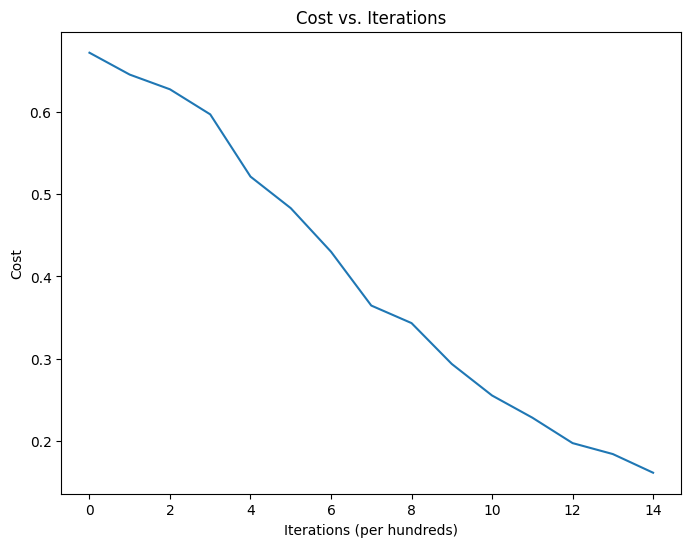

Train Accuracy:  98.08612440191388
Test Accuracy:  82.0


In [8]:
parameters, costs = model(
    train_set_x,
    train_set_y,
    layers_dims=[12288, 20, 7, 5, 1],
    n_iters=1500,
    print_cost=True,
)
plot_costs(costs)

# Evaluating the DNN model on training set
y_pred_train = predict(train_set_x, parameters)
print("Train Accuracy: ", accuracy(train_set_y, y_pred_train))

# Evaluating the DNN model on test set
y_pred_test = predict(test_set_x, parameters)
print("Test Accuracy: ", accuracy(test_set_y, y_pred_test))

## Displaying mislabeled images

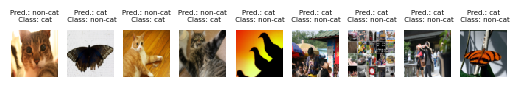

In [9]:
print_mislabeled_images(classes, test_set_x, test_set_y, y_pred_test)

## Prediction on Real World Data

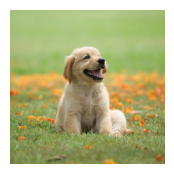

Prediction:  Not Cat


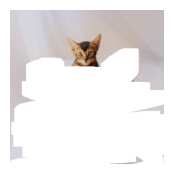

Prediction:  Cat


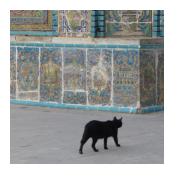

Prediction:  Cat


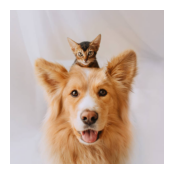

Prediction:  Cat


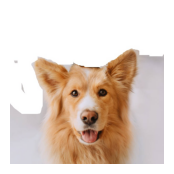

Prediction:  Not Cat


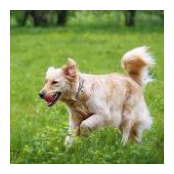

Prediction:  Not Cat


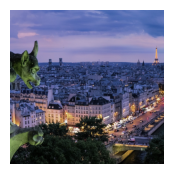

Prediction:  Not Cat


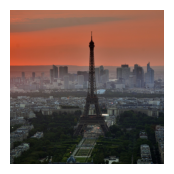

Prediction:  Not Cat


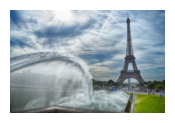

Prediction:  Not Cat


In [10]:
folder_path = "images"
image_files = os.listdir(folder_path)
for image_file in image_files:
    if not image_file.startswith("."):
        image_path = os.path.join(folder_path, image_file)
        prediction = classify_image(image_path, parameters)
        print("Prediction: ", prediction)

## Authors

Alok Ranjan

[GitHub Profile](https://www.linkedin.com/in/alokranjan-in/)

 [LinkedIn Profile](https://github.com/AlokRanjanIN)